<a href="https://colab.research.google.com/github/Ankit-5087/Ankit-5087/blob/main/Plant_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading training dataset: /content/drive/MyDrive/Colab Notebooks/SET/Train


100%|██████████| 56/56 [00:02<00:00, 23.19it/s]


Number of training examples: 5244
Number of testing examples: 1
Each image is of size: (150, 150)
Epoch 1/20
33/33 [==============================] - 144s 4s/step - loss: 2.7531 - accuracy: 0.2589 - val_loss: 1.8154 - val_accuracy: 0.3947
Epoch 2/20
33/33 [==============================] - 143s 4s/step - loss: 1.4765 - accuracy: 0.5137 - val_loss: 1.2451 - val_accuracy: 0.5891
Epoch 3/20
33/33 [==============================] - 154s 5s/step - loss: 0.9889 - accuracy: 0.6718 - val_loss: 1.0469 - val_accuracy: 0.6339
Epoch 4/20
33/33 [==============================] - 154s 5s/step - loss: 0.6391 - accuracy: 0.7962 - val_loss: 0.8055 - val_accuracy: 0.7378
Epoch 5/20
33/33 [==============================] - 144s 4s/step - loss: 0.4278 - accuracy: 0.8665 - val_loss: 0.6229 - val_accuracy: 0.7893
Epoch 6/20
33/33 [==============================] - 143s 4s/step - loss: 0.2971 - accuracy: 0.9163 - val_loss: 0.5975 - val_accuracy: 0.8055
Epoch 7/20
33/33 [==============================] - 159s

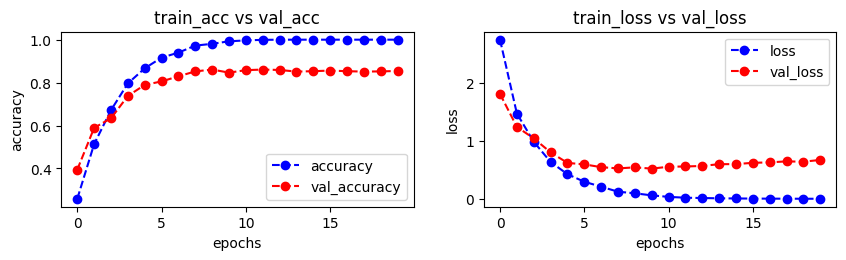

1/1 [==============================] - 0s 152ms/step
Predicted Label: Artocarpus Heterophyllus (Jackfruit)


In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from google.colab import drive
drive.mount('/content/drive')

class_names = ['Aloe barbadensis miller (Aloevera)', 'Alpinia Galanga (Rasna)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Religiosa (Peepal Tree)', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango fruit)', 'Mangifera Indica (Mango leaf)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Psidium Guajava (Guava fruit)', 'Psidium Guajava (Guava leaf)', 'Punica Granatum (Pomegranate)', 'Rosa-sinensis (Hibiscus)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Zingiber officinale Roscoe (Ginger)']

IMAGE_SIZE = (150, 150)

def pre_process(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    return image

def load_data(training_dataset_paths, testing_image_path):
    train_data = []

    # Load training data
    for dataset_path in training_dataset_paths:
        images = []
        labels = []

        print("Loading training dataset: {}".format(dataset_path))

        for folder in os.listdir(dataset_path):
            label = class_names.index(folder)  # Get label index from class_names

            folder_path = os.path.join(dataset_path, folder)

            for file in tqdm(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, file)

                # Assuming you have a pre_process function defined
                image = pre_process(img_path)

                if image is not None:  # Check if pre_process successfully loaded the image
                    images.append(image)
                    labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        train_data.append((images, labels))

    # Load the single testing image
    test_images = [pre_process(testing_image_path)]

    return train_data, test_images

# Define paths to your training dataset and the single testing image
train_datasets = ['/content/drive/MyDrive/Colab Notebooks/SET/Train']
test_image_path = '/content/drive/MyDrive/Colab Notebooks/SET/Test/AH-S-005.jpg'

train_data, test_images = load_data(train_datasets, test_image_path)

# Shuffle training data
train_images, train_labels = train_data[0]
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

n_train = train_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of testing examples: 1")  # Only one test image
print("Each image is of size: {}".format(IMAGE_SIZE))

train_images = train_images / 255.0
test_images = np.array(test_images, dtype='float32') / 255.0

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.2)

# Plot accuracy and loss
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10, 5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label="loss")
    plt.plot(history.history['val_loss'], 'ro--', label="val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

# Plot accuracy and loss
plot_accuracy_loss(history)

# Load the single testing image
test_images = [pre_process(test_image_path)]

# Preprocess the test image and normalize it
test_images = np.array(test_images, dtype='float32') / 255.0

# Use the model to predict the label for the test image
predictions = model.predict(test_images)  # Vector of probabilities
predicted_label = np.argmax(predictions[0])  # Find the label with the highest probability

# Print the predicted label
print("Predicted Label:", class_names[predicted_label])


In [ ]:
from PIL import Image, ImageOps  # Import the PIL library

In [ ]:
# Define the function to make predictions on a single image
def predict_single_image(image_path, model, class_names):
    data = np.ndarray(shape=(1, 150, 150, 3), dtype=np.float32)

    # Open the image using PIL
    image = Image.open(image_path)

    # Resize the image
    size = (150, 150)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)

    # Convert the image to a numpy array
    image_array = np.asarray(image)

    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

    # Load the image into the array
    data[0] = normalized_image_array

    # Run the inference
    prediction = model.predict(data)

    # Get the predicted label
    pred_label = np.argmax(prediction, axis=1)

    # Get the corresponding class name
    class_prediction = class_names[pred_label[0]]

    return class_prediction

# Example usage:
test_image_path = '/content/drive/MyDrive/Colab Notebooks/SET/Train/Mentha (Mint)/M-S-002.jpg'
predicted_class = predict_single_image(test_image_path, model, class_names)
print(f'Predicted Label: {predicted_class}')

1/1 [==============================] - 0s 47ms/step
Predicted Label: Mentha (Mint)


<ipython-input-33-01393d748419>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


In [ ]:
if predicted_class == 'Aloe barbadensis miller (Aloevera)':
    print('Aloe barbadensis miller (Aloevera): Also known as Aloevera, this plant can be used for various medicinal purposes. It is commonly used for skincare to soothe burns, moisturize the skin, and treat skin conditions. It also has potential benefits for digestion, immunity, and reducing inflammation.')

if predicted_class == 'Alpinia Galanga (Rasna)':
    print('Alpinia Galanga (Rasna): Rasna is known for its anti-inflammatory properties and is used in traditional medicine to treat various ailments. It can help with digestive issues, respiratory problems, and may have antioxidant benefits.')

if predicted_class == 'Artocarpus Heterophyllus (Jackfruit)':
    print('Artocarpus Heterophyllus (Jackfruit): Jackfruit is a nutritious fruit with a unique flavor. It is rich in vitamins, minerals, and fiber. Jackfruit seeds are also used in traditional medicine for their potential health benefits.')

if predicted_class == 'Azadirachta Indica (Neem)':
    print('Azadirachta Indica (Neem): Neem is often referred to as the "wonder tree" due to its numerous medicinal properties. It is used for skincare, haircare, and has antimicrobial and anti-inflammatory properties. Neem also plays a role in traditional medicine.')

if predicted_class == 'Basella Alba (Basale)':
    print('Basella Alba (Basale): Basale has an anti-inflammatory activity and wound healing ability. It can be helpful as a first aid, and the leaves of this plant can be crushed and applied to burns, scalds, and wounds to help in the healing of the wounds.')

if predicted_class == 'Brassica Juncea (Indian Mustard)':
    print('Brassica Juncea (Indian Mustard): Indian Mustard and its oil are widely used for the relief of joint pain, swelling, fever, coughs, and colds. The mustard oil can be used as a massage oil, skin serum, and for hair treatment.')

if predicted_class == 'Carissa Carandas (Karanda)':
    print('Carissa Carandas (Karanda): Karanda is especially used in treating problems regarding digestion. It is used to cure worm infestation, gastritis, dermatitis, splenomegaly, and indigestion.')

if predicted_class == 'Citrus Limon (Lemon)':
    print('Citrus Limon (Lemon): Lemons are an excellent source of Vitamin C and fiber, which can lower the risk factors leading to heart diseases. Lemons are also known to prevent Kidney Stones as they have Citric acid that helps in preventing Kidney Stones.')

if predicted_class == 'Ficus Religiosa (Peepal Tree)':
    print('Ficus Religiosa (Peepal Tree): The bark of the Peeple tree, rich in vitamin K, is an effective complexion corrector and preserver. It also helps in various ailments such as strengthening blood capillaries, minimizing inflammation, and healing skin bruises faster.')

if predicted_class == 'Jasminum (Jasmine)':
    print('Jasminum (Jasmine): Jasmine is used in the curing of liver diseases, such as hepatitis, and in abdominal pain caused due to intense diarrhea or dysentery. The smell of Jasmine flowers can be used to improve mood, reduce stress levels, and also reduce food cravings. Jasmine can also be used to help in fighting skin diseases and speed up the process of wound healing.')

if predicted_class == 'Mangifera Indica (Mango fruit)':
    print('Mangifera Indica (Mango fruit): Mangoes are full of carotenoids, the yellow pigments that give mangoes their characteristic color. They are high in Vitamin A, which helps in preventing heart diseases and eye problems such as cataracts and macular degeneration and provides you with excellent eyesight.')

if predicted_class == 'Mangifera Indica (Mango leaf)':
    print('Mangifera Indica (Mango leaf): Mango leaves have potential health benefits, including managing diabetes, reducing hypertension, and supporting overall health.')

if predicted_class == 'Mentha (Mint)':
    print('Mentha (Mint): Mint is used in daily life to keep bad mouth odor at bay, but besides that, this plant also helps in various other functions such as relieving indigestion, upset stomach, and can also improve Irritable Bowel Syndrome (IBS). Mint is also full of nutrients such as Vitamin A, Iron, Manganese, Folate, and Fiber.')

if predicted_class == 'Moringa Oleifera (Drumstick)':
    print('Moringa Oleifera (Drumstick): Drumstick contains high amounts of Vitamin C and antioxidants, which help you build up your immune system and fight against common infections such as the common cold and flu. Bioactive compounds in this plant help to relieve you from thickening of the arteries and lessen the chance of developing high blood pressure. Due to a high amount of calcium, Drumstick helps in developing strong and healthy bones.')

if predicted_class == 'Ocimum Tenuiflorum (Tulsi)':
    print('Ocimum Tenuiflorum (Tulsi): Tulsi plant has the potential to cure a lot of ailments and is used a lot in traditional remedies. Tulsi can help cure fever, treat skin problems like acne, blackheads, and premature aging, and treat insect bites. Tulsi is also used to treat heart disease and fever, and respiratory problems.')

if predicted_class == 'Piper Betle (Betel)':
    print('Piper Betle (Betel): The leaves of Betel possess immense therapeutic potential and are often used to cure mood swings and even depression. They are also quite an effective way to improve digestive health as they effectively neutralize pH imbalances in the stomach. The leaves are also full of many antimicrobial agents that combat the bacteria in your mouth.')

if predicted_class == 'Psidium Guajava (Guava fruit)':
    print('Psidium Guajava (Guava fruit): Aside from bearing a delicious taste, the fruit of the Guava tree is a rich source of Vitamin C and antioxidants. It is especially effective against preventing infections such as Gastrointestinal infections, Respiratory infections, Oral/dental infections, and Skin infections. It can also aid in the treatment of Hypertension, Fever, Pain, Liver, and Kidney problems.')

if predicted_class == 'Psidium Guajava (Guava leaf)':
    print('Psidium Guajava (Guava leaf): Guava leaves have potential medicinal benefits, including helping to control blood sugar levels and supporting digestive health.')

if predicted_class == 'Punica Granatum (Pomegranate)':
    print('Punica Granatum (Pomegranate): Pomegranate has a variety of medical benefits. It is rich in antioxidants, which reduce inflammation, protect cells from damage, and eventually lower the chances of cancer. It is also a great source of Vitamin C and an immunity booster. Pomegranate has also shown to stall the progress of Alzheimer disease and protect memory.')

if predicted_class == 'Rosa-sinensis (Hibiscus)':
    print('Rosa-sinensis (Hibiscus): The tea of the hibiscus flowers is quite prevalent and is used mainly to lower blood pressure and prevent Hypertension. It is also used to relieve dry coughs. Some studies suggest that the tea has an effect in relieving fever, diabetes, gallbladder attacks, and even cancer. The roots of this plant can also be used to prepare a tonic.')

if predicted_class == 'Santalum Album (Sandalwood)':
    print('Santalum Album (Sandalwood): Sandalwood is used for treating the common cold, cough, bronchitis, fever, and sore mouth and throat. It is also used to treat urinary tract infections (UTIs), liver disease, gallbladder problems, heatstroke, gonorrhea, headache, and conditions of the heart and blood vessels (cardiovascular disease).')

if predicted_class == 'Syzygium Cumini (Jamun)':
    print('Syzygium Cumini (Jamun): The fruit extract of the Jamun plant is used in treating the common cold, cough, and flu. The bark of this tree contains components like tannins and carbohydrates that can be used to fight dysentery. Jamun juice is used for treating sore throat problems and is also effective in the enlargement of the spleen.')

if predicted_class == 'Syzygium Jambos (Rose Apple)':
    print('Syzygium Jambos (Rose Apple): The Jamaican Cherry plant has anti-diabetic properties which can potentially cure type 2 diabetes. Jamaican Cherry tea contains rich amounts of nitric oxide, which relaxes blood vessels, reducing the chance of hypertension. Other than that, it can help to relieve pain, prevent infections, boost immunity, and promote digestive health.')

if predicted_class == 'Zingiber officinale Roscoe (Ginger)':
    print('Zingiber officinale Roscoe (Ginger): Ginger has been used for centuries for its potential health benefits. It is known for its anti-nausea and anti-inflammatory properties. Ginger is often used to alleviate digestive issues, reduce muscle pain, and boost the immune system.')




Mangifera Indica (Mango fruit): Mangoes are full of carotenoids, the yellow pigments that give mangoes their characteristic color. They are high in Vitamin A, which helps in preventing heart diseases and eye problems such as cataracts and macular degeneration and provides you with excellent eyesight.


In [ ]:
model.save('model_sev.h5')